In [7]:
!git clone https://github.com/IvanBenedictus/mental_health.git

Cloning into 'mental_health'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 45 (delta 19), reused 26 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 3.43 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [32]:
from wordcloud import WordCloud
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_excel('/content/mental_health/data/cleaned_data.csv')
df.head(5)

prompt  \
0                        I feel really alone lately.   
1         I keep feeling like nobody understands me.   
2  I just want someone to talk to, but I don't kn...   
3                     Feeling really down and alone.   
4  I'm bored and lonely waiting for something to ...   

                                              chosen  \
0  Loneliness can be tough, but there are ways to...   
1  It's important to have people who understand y...   
2  That's a brave step to want to connect with so...   
3  Loneliness and feeling down can go hand in han...   
4  Feeling bored and lonely can be a drag. Have y...   

                                            rejected          category  \
0  Everyone feels lonely sometimes, just get out ...  social isolation   
1         The internet is full of people to talk to.  social isolation   
2  Maybe if you weren't so negative, people would...  social isolation   
3  Just suck it up, everyone feels lonely sometimes.  social isolation   
4  College is a great place to meet new people. Y...  social isolation   

                 data src Response Source  
0  jaswanthi(reddit data)             NaN  
1  jaswanthi(reddit data)             NaN  
2  jaswanthi(reddit data)             NaN  
3  jaswanthi(reddit data)             NaN  
4  jaswanthi(reddit data)             NaN

### Cleaning The Data

In [12]:
import re
from string import punctuation
from nltk.corpus import stopwords

# Define custom stopwords
stop_w = set(stopwords.words('english') + ['youre', 'im', 'lets', 'would', 'ive', 'dont'])

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_w])

    return text

In [14]:
df['clean_prompt']=df['prompt'].apply(clean_text)
df['clean chosen']=df['chosen'].apply(clean_text)
df['clean rejected']=df['rejected'].apply(clean_text)

df['prompt_len']= df.prompt.str.len()
df['chosen_len']= df.chosen.str.len()
df['rejected_len']= df.rejected.str.len()

df.head()

prompt  \
0                        I feel really alone lately.   
1         I keep feeling like nobody understands me.   
2  I just want someone to talk to, but I don't kn...   
3                     Feeling really down and alone.   
4  I'm bored and lonely waiting for something to ...   

                                              chosen  \
0  Loneliness can be tough, but there are ways to...   
1  It's important to have people who understand y...   
2  That's a brave step to want to connect with so...   
3  Loneliness and feeling down can go hand in han...   
4  Feeling bored and lonely can be a drag. Have y...   

                                            rejected          category  \
0  Everyone feels lonely sometimes, just get out ...  social isolation   
1         The internet is full of people to talk to.  social isolation   
2  Maybe if you weren't so negative, people would...  social isolation   
3  Just suck it up, everyone feels lonely sometimes.  social isolation   
4  College is a great place to meet new people. Y...  social isolation   

                 data src Response Source  \
0  jaswanthi(reddit data)             NaN   
1  jaswanthi(reddit data)             NaN   
2  jaswanthi(reddit data)             NaN   
3  jaswanthi(reddit data)             NaN   
4  jaswanthi(reddit data)             NaN   

                            clean_prompt  \
0               feel really alone lately   
1   keep feeling like nobody understands   
2           want someone talk know start   
3                   feeling really alone   
4  bored lonely waiting something happen   

                                        clean chosen  \
0  loneliness tough ways feel connected tried rea...   
1  important people understand feeling lonely mak...   
2  thats brave step want connect someone many res...   
3  loneliness feeling go hand hand tried talking ...   
4  feeling bored lonely drag tried reaching see f...   

                                      clean rejected  prompt_len  chosen_len  \
0                everyone feels lonely sometimes get          27         682   
1                          internet full people talk          42         602   
2           maybe werent negative people want around          64         595   
3               suck everyone feels lonely sometimes          30         488   
4  college great place meet new people wont lonel...          53         439   

   rejected_len  
0            57  
1            42  
2            74  
3            49  
4            74

### Category Distribution

In [15]:
# Distribution of categories
category_distribution = df['category'].value_counts()
category_distribution

category
social isolation          829
social media addiction    775
cyberbullying             761
Name: count, dtype: int64

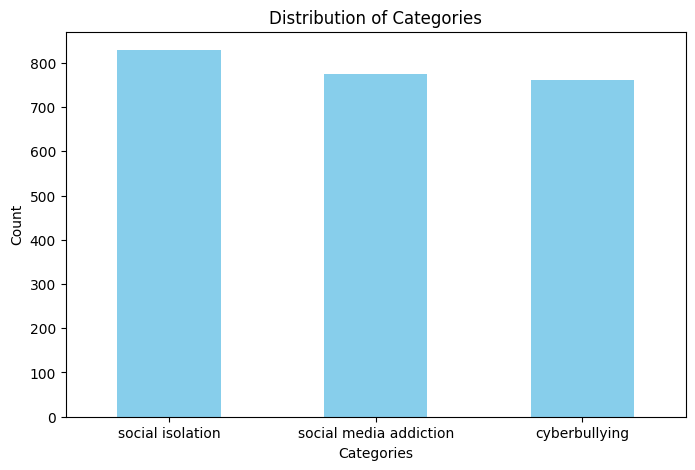

In [26]:
# Plotting The Distribution
plt.figure(figsize=(8, 5))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.show()

### Prompt vs Answer Length

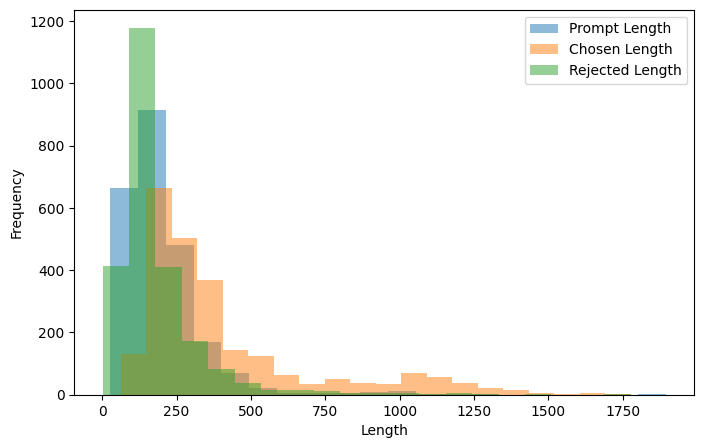

In [27]:
# Text Analysis
plt.figure(figsize=(8, 5))
plt.hist(df['prompt_len'], bins=20, alpha=0.5, label='Prompt Length')
plt.hist(df['chosen_len'], bins=20, alpha=0.5, label='Chosen Length')
plt.hist(df['rejected_len'], bins=20, alpha=0.5, label='Rejected Length')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

### Word Cloud for Prompt and Answers

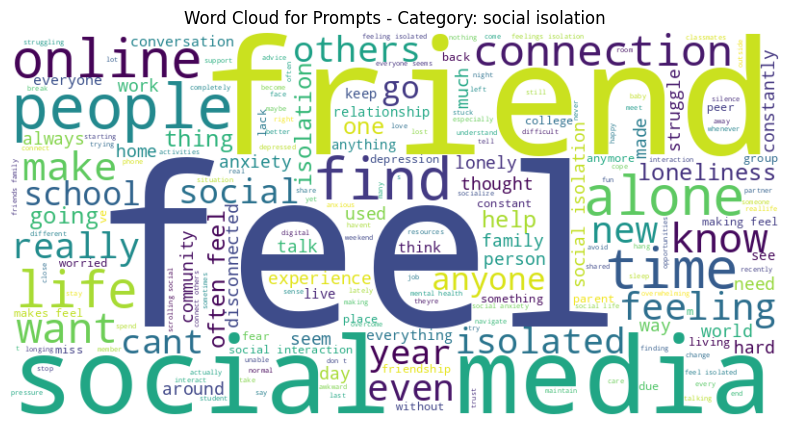

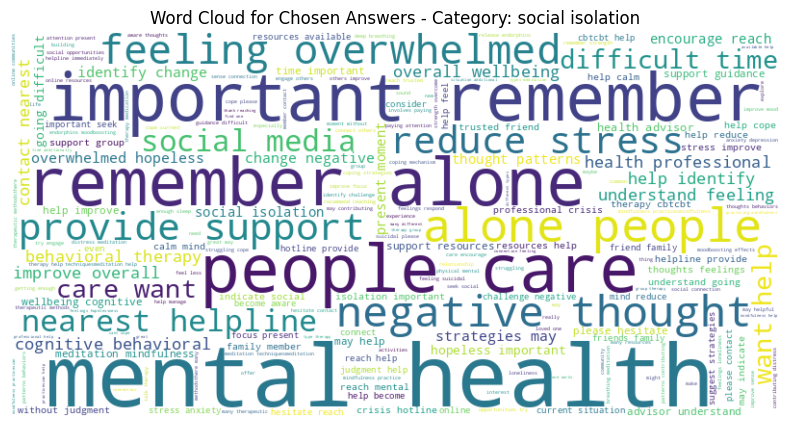

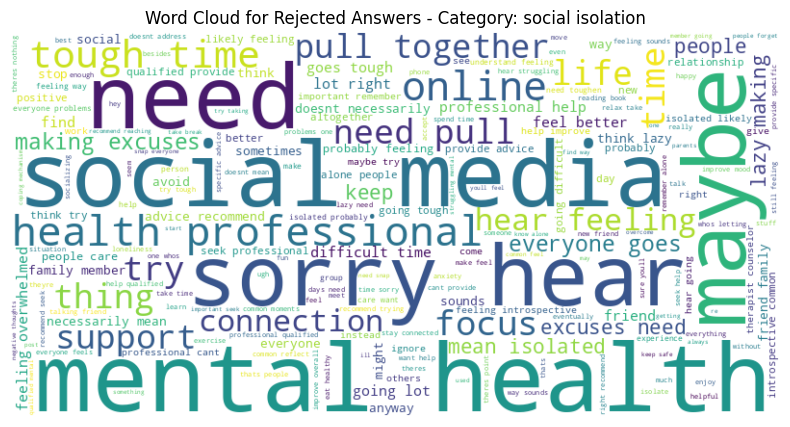

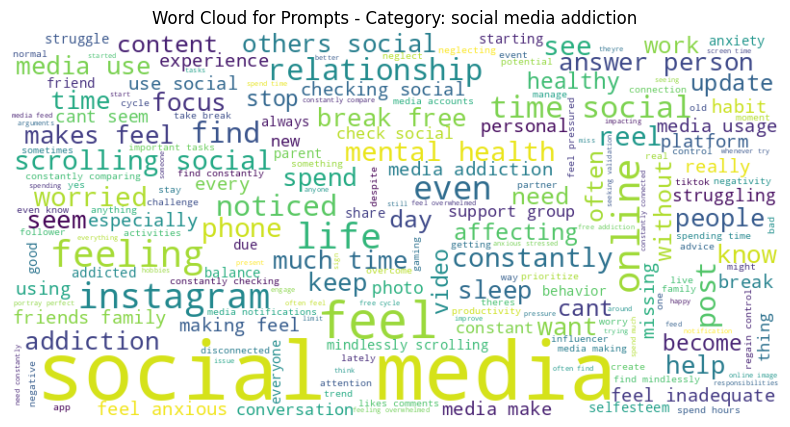

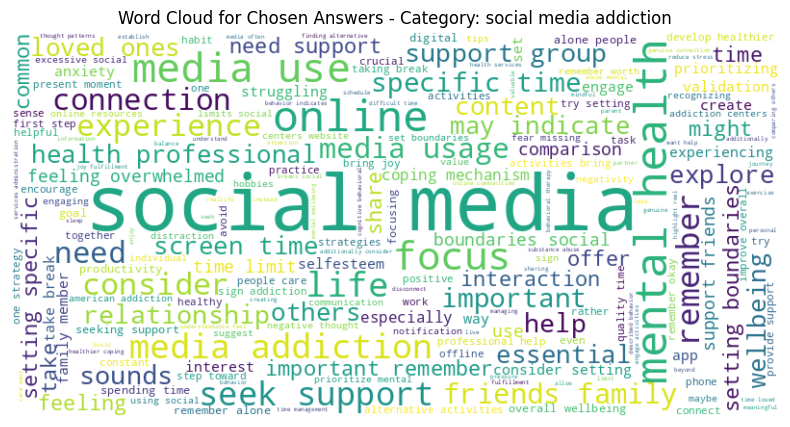

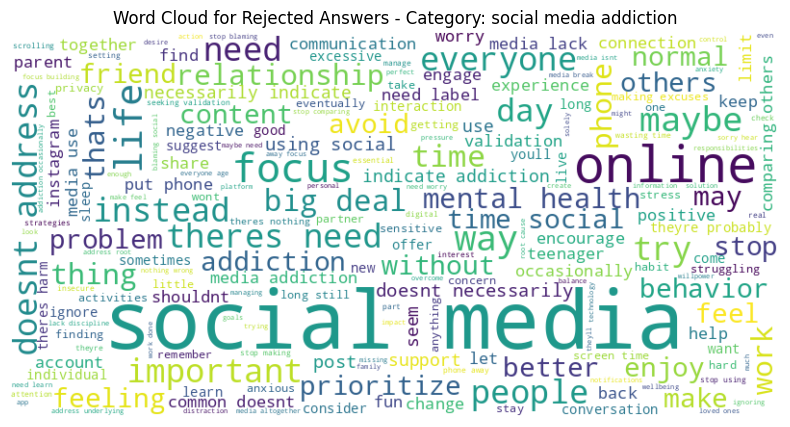

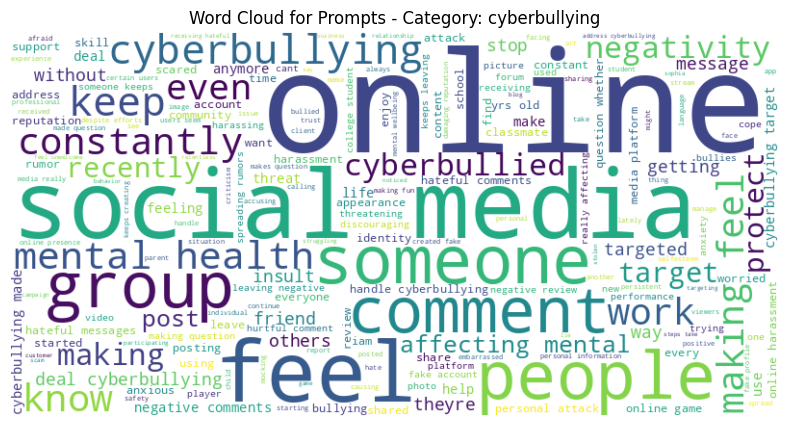

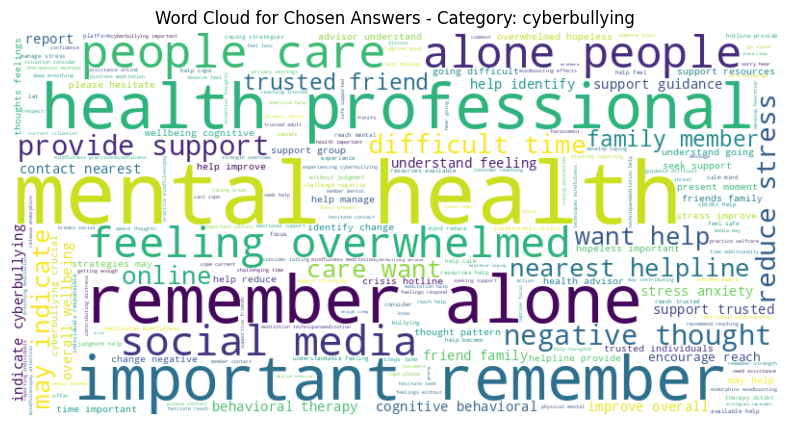

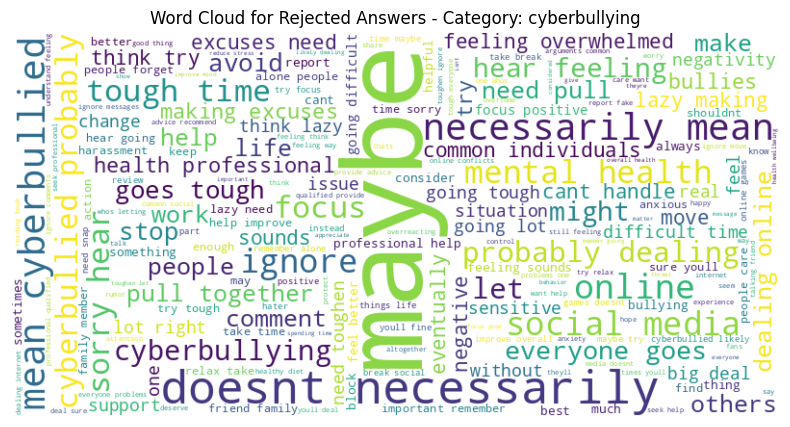

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unique categories in the 'category' column
unique_categories = df['category'].unique()

# Generate and display word clouds for each category
for category in unique_categories:
    category_df = df[df['category'] == category]

    # Word cloud for prompts
    wordcloud_prompt = WordCloud(width=800, height=400, background_color='white').generate(' '.join(category_df['clean_prompt']))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_prompt, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Prompts - Category: {category}')
    plt.tight_layout()
    plt.show()

    # Word cloud for chosen
    wordcloud_chosen = WordCloud(width=800, height=400, background_color='white').generate(' '.join(category_df['clean chosen']))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_chosen, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Chosen Answers - Category: {category}')
    plt.tight_layout()
    plt.show()

    # Word cloud for rejected
    wordcloud_rejected = WordCloud(width=800, height=400, background_color='white').generate(' '.join(category_df['clean rejected']))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_rejected, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Rejected Answers - Category: {category}')
    plt.tight_layout()
    plt.show()


### Top 10 Words for Each Category

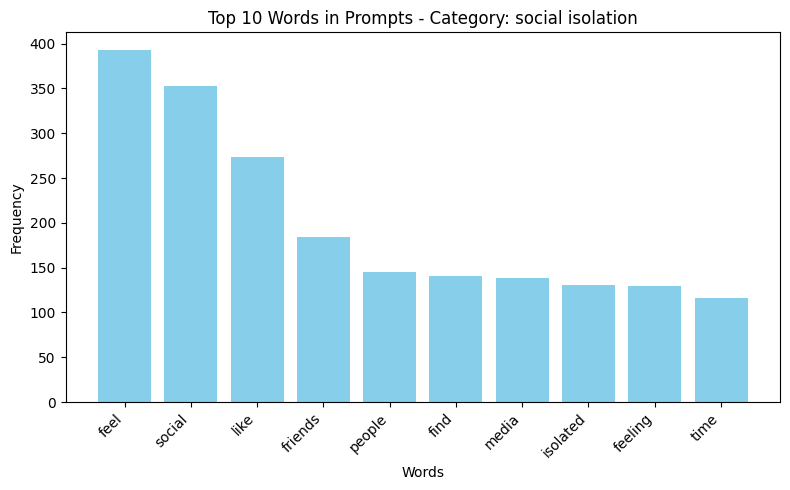

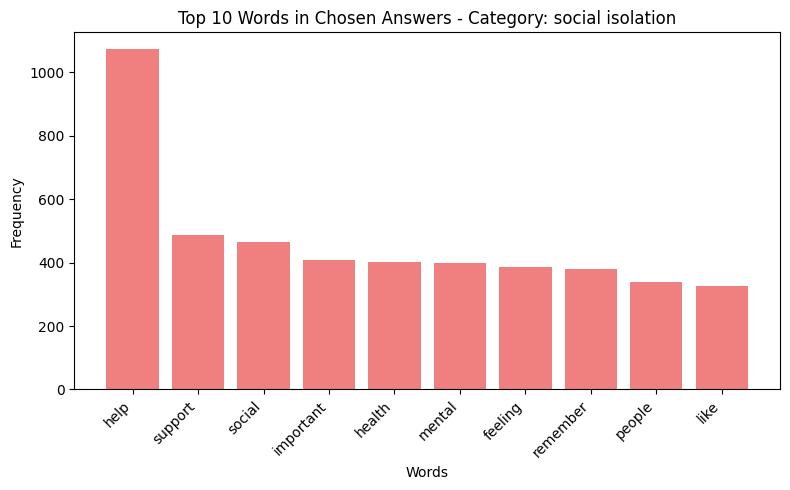

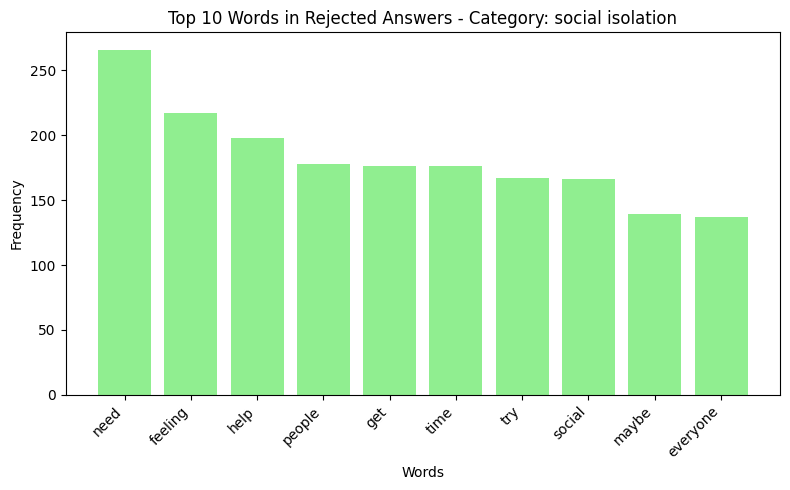

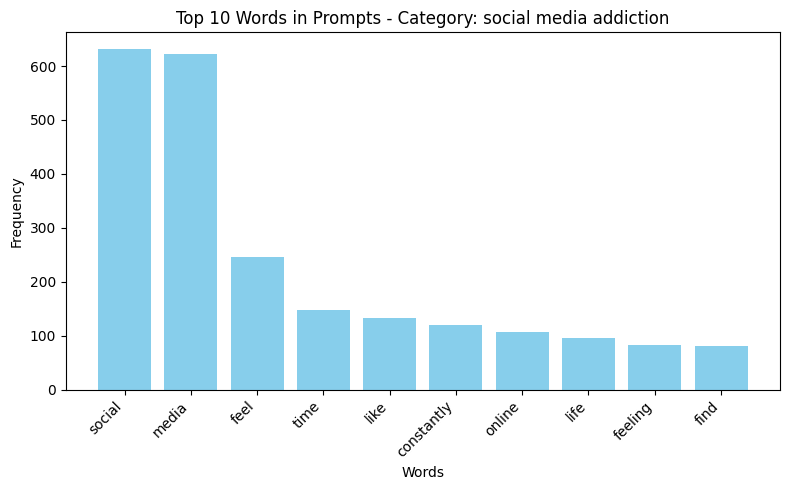

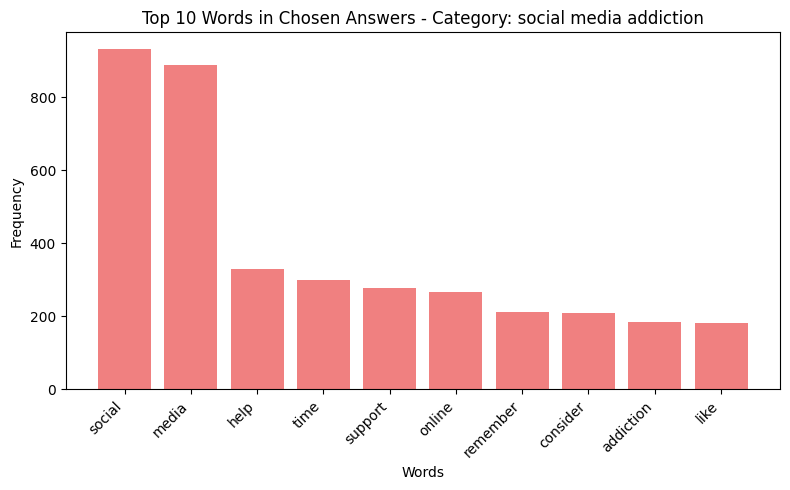

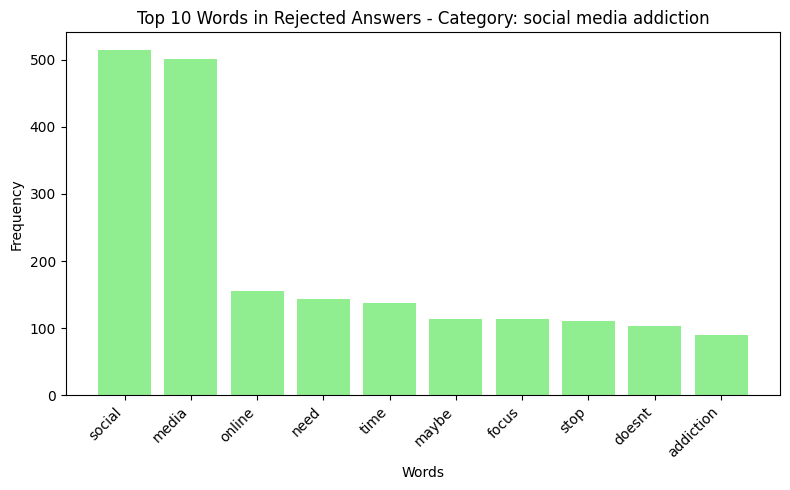

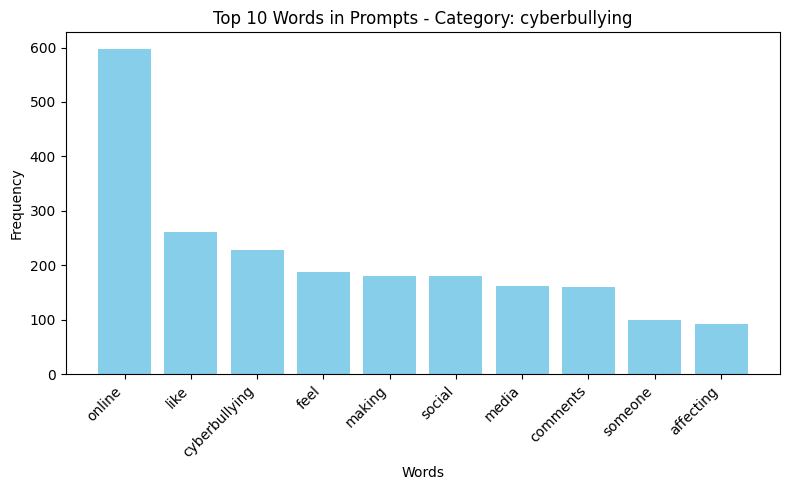

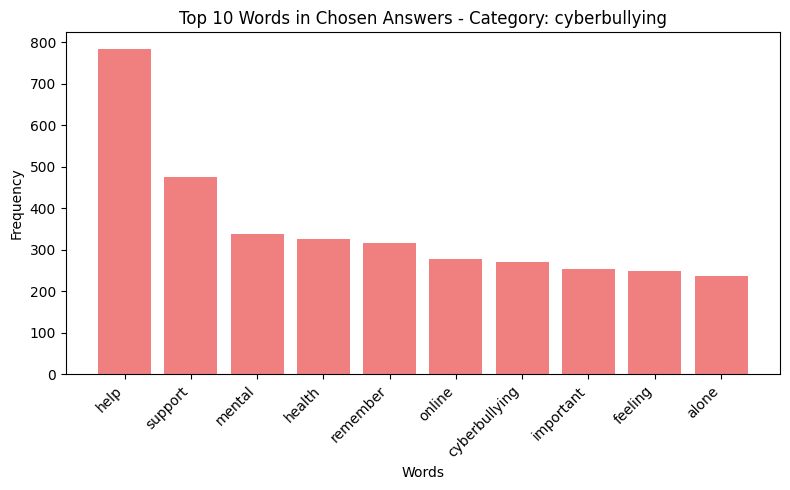

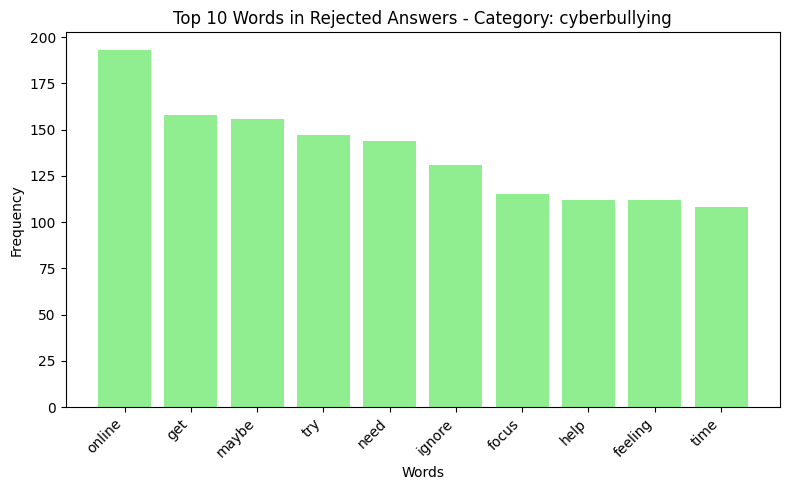

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# Get unique categories
unique_categories = df['category'].unique()

# Function to get top n words from a text
def get_top_words(text, n=10):
    word_counts = Counter(text.split())
    return dict(word_counts.most_common(n))

# Iterate through each category
for category in unique_categories:
    category_df = df[df['category'] == category]

    # Get top 10 words in prompts
    top_prompt_words = get_top_words(' '.join(category_df['clean_prompt']))

    # Plot top 10 words in prompts
    plt.figure(figsize=(8, 5))  # Consistent size
    plt.bar(top_prompt_words.keys(), top_prompt_words.values(), color='skyblue')
    plt.title(f'Top 10 Words in Prompts - Category: {category}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ensure no clipping
    plt.show()

    # Get top 10 words in chosen answers
    top_answer_words = get_top_words(' '.join(category_df['clean chosen']))

    # Plot top 10 words in chosen answers
    plt.figure(figsize=(8, 5))  # Consistent size
    plt.bar(top_answer_words.keys(), top_answer_words.values(), color='lightcoral')
    plt.title(f'Top 10 Words in Chosen Answers - Category: {category}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ensure no clipping
    plt.show()

    # Get top 10 words in rejected answers
    top_rej_words = get_top_words(' '.join(category_df['clean rejected']))

    # Plot top 10 words in rejected answers
    plt.figure(figsize=(8, 5))  # Consistent size
    plt.bar(top_rej_words.keys(), top_rej_words.values(), color='lightgreen')
    plt.title(f'Top 10 Words in Rejected Answers - Category: {category}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ensure no clipping
    plt.show()
